### Stat 201 - Final Report

## How the Damaged Area Caused by Forest Fire Differs Based on Different Seasons

##### Group 36 - Jenny Lee, Prithvi Sureka, Junhao Wen, Zimo Zhang

## 1 Introduction

#### 1.1 Background

Past studies have shown that forest fires are an unavoidable natural phenomenon, and they're also increasingly dangerous as communities continue to spread away from urban areas. In 2018, nearly 60,000 fires burned parts of the continental United States. In November of that year alone, the fires killed more than 90 people and destroyed an estimated 14,000 homes and businesses (Linn, 2019). To prevent such detrimental consequences, it is necessary to understand the factors that are related to the degree of damage caused by forest fires.


One may ask if there is a relationship between the time of the year and the degree of damage inflicted by the forest fire. According to the data collected by the United States Environmental Protection Agency, from 1992 to 2015, the total acres burned by forest fires vary depending on different months of the year (Beckwith et al., 2018). This project aims to get an answer for this question: Do different months affect the area of damage caused by forest fires?


#### 1.2 Dataset Description
We selected a forest fire data set from the Montesinho natural park, from the Tr´as-os-Montes northeast region of Portugal (P. Cortez & A. Morais, 2007). We will focus on the month of the year and the burned area (in ha). Among the months, we will use data for February and August as representative months for winter and summer, respectively, to compare the means of the damaged area between the two months. There are 20 and 183 observations for the February and the August samples, respectively. We have decided to use data for February and August to represent winter and summer because they are the months that have the highest number of observations. We intend to choose the months with the greatest sample sizes in order to increase the precision of the results. There are only 9 and 2 observations for December and January, and these numbers are significantly lower than the sample size of the February grouop. Similarly, because there are only 17 and 32 observations data for June and July samples, we have decided to use the August data. The metric we are interested in is: damage area - month. 


#### 1.3 Questions
What do you expect to find? <br>
Through this study, we can find if the forest fires yield different mean amounts of the damaged area in February and August. 

What impact could such findings have? <br>
This finding may help people with understanding the approximate extensions of damaged areas caused by forest fires in different months of the year and making appropriate responses to potential fire incidents. 

What future questions could this lead to? <br>
In the future, we may ask if the conclusion of the study would have been different if the data were collected in countries other than Portugal. Also, we may ask what specific factors are related to the degree of damage caused by forest fires.


## 2 Methods and Results

### 2.1 Preliminary Results

In [1]:
# Load package
library(tidyverse)
library(GGally)
library(broom)
library(repr)
library(digest)
library(infer)
library(gridExtra)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




#### 2.1.1 Read Data

In [2]:
# Read in the forest fires data from https://archive.ics.uci.edu/ml/datasets/forest+fires 
forestfires_data <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv")

print('Table 1. The forest fire dataset')
head(forestfires_data)

Rows: 517 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): month, day
dbl (11): X, Y, FFMC, DMC, DC, ISI, temp, RH, wind, rain, area

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "Table 1. The forest fire dataset"


X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0
7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0
7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0
8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0
8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0
8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0


As indicated in the introduction, the forest fires occur differently depending on the time of the year, so we chose the two most months, February and August, as the representatives of winter and summer respectively.

#### 2.1.2 Clean and Wrangle Data

In [3]:
# Clean and wrangle the data set, drop the irrelevant rows and columns
# Since there is an outlier there, which rather affects our analysis, and then filter it out
forestfires <-forestfires_data |>
              filter(month %in% c("feb", "aug"), area < 400) |>
              select(month, area)
print('Table 2. The area damaged by each forest fire incident in August and February')
head(forestfires)

[1] "Table 2. The area damaged by each forest fire incident in August and February"


month,area
<chr>,<dbl>
aug,0
aug,0
aug,0
aug,0
aug,0
aug,0


#### 2.1.3 Relevant Data and Plot

[1] "Figure 1. The boxplot of the damaged area caused by each forest fire incident in August and February"


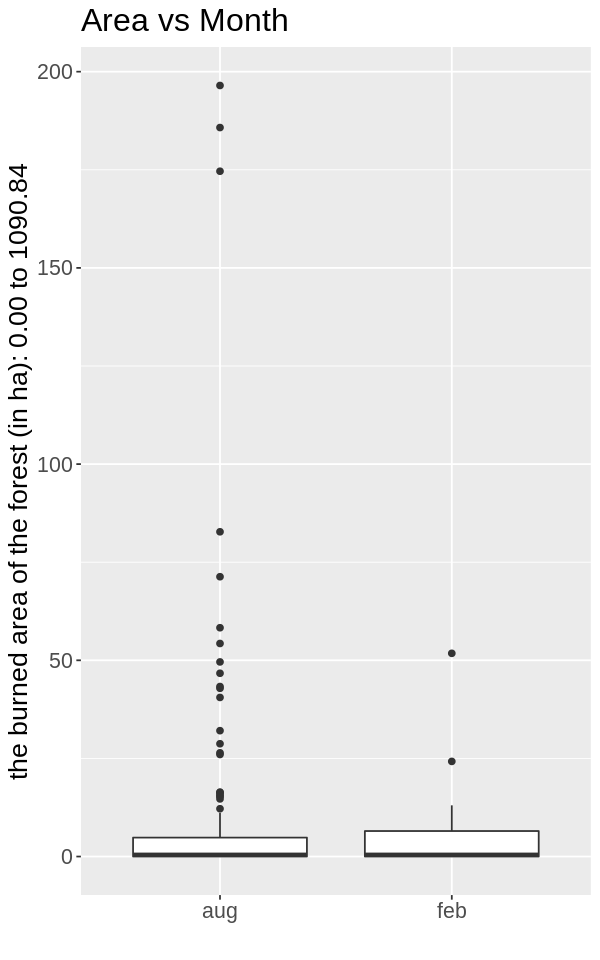

In [4]:
# Creat boxplot of all numeric variables
options(repr.plot.width = 5, repr.plot.height = 8)

area_month_plot <- forestfires|>
    ggplot(aes(y = area, x = month)) +
    geom_boxplot()+
    labs(x = "", y = "the burned area of the forest (in ha): 0.00 to 1090.84") +
    theme(text=element_text(size=16)) +                    
    labs(title = "Area vs Month")

print('Figure 1. The boxplot of the damaged area caused by each forest fire incident in August and February')
area_month_plot

We will keep the month as the explanatory variable, and the burned area as the response variable. 

In [5]:
# Calculate the mean and standard deviation of damage area
forestfires_summary <- forestfires %>% 
                       mutate(month = as.factor(month)) %>% 
                       summary()

forestfires_summary

 month          area        
 aug:183   Min.   :  0.000  
 feb: 20   1st Qu.:  0.000  
           Median :  0.540  
           Mean   :  8.262  
           3rd Qu.:  5.310  
           Max.   :196.480  

In [6]:
# Damage area
# Summary of the mean, standard deviation, variance, and the size of each sample
area_estimates <- forestfires %>%
           group_by(month) %>%
           summarize(sample_mean = mean(area), sample_sd = sd(area), sample_var = var(area), n = n())

print('Table 3. The mean, standard deviation, variance, and size of the August and February samples')
area_estimates

[1] "Table 3. The mean, standard deviation, variance, and size of the August and February samples"


month,sample_mean,sample_sd,sample_var,n
<chr>,<dbl>,<dbl>,<dbl>,<int>
aug,8.47929,26.25217,689.1762,183
feb,6.27500,12.34251,152.3376,20


[1] "Figure 2. The population distribution of the damaged areas"


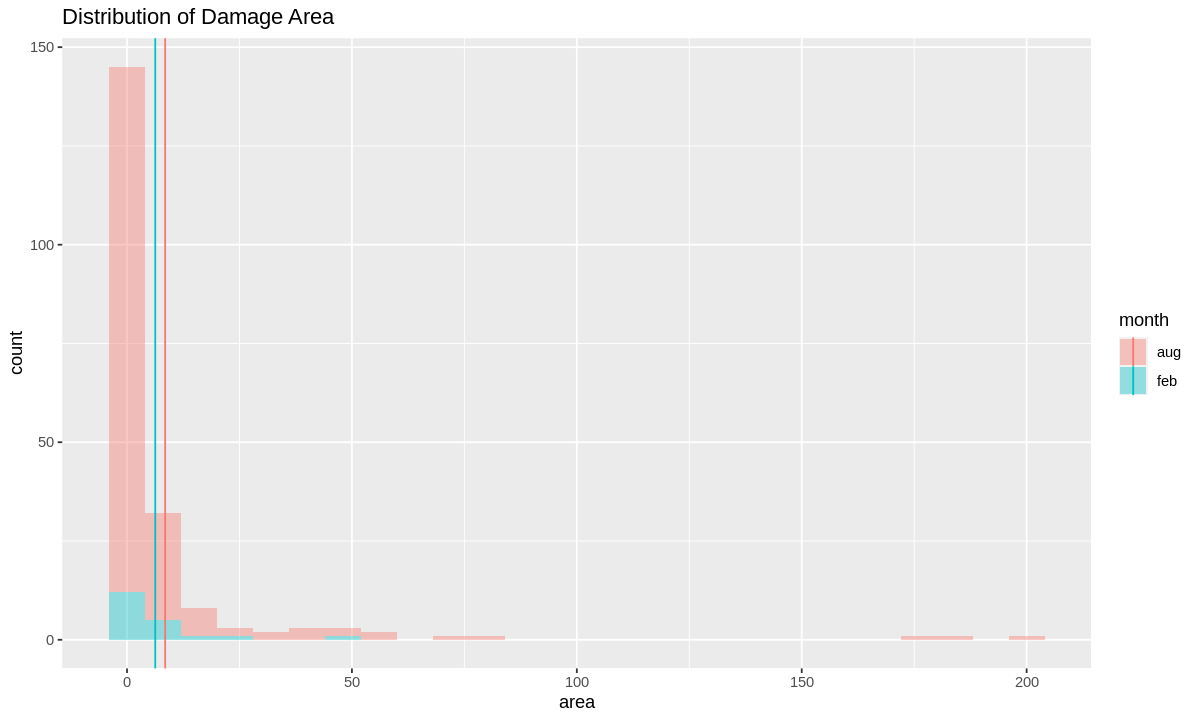

In [7]:
# Creat the distribution plot of damage area
# The vertical line represents the mean of each sample
options(repr.plot.width = 10, repr.plot.height = 6)

area_dist <- forestfires|> 
    ggplot(aes(x = area, fill = month)) +
    geom_histogram(binwidth = 8, alpha = 0.4)+
    ggtitle("Distribution of Damage Area")+
    geom_vline(data = area_estimates, aes(xintercept = sample_mean, color = month))

print('Figure 2. The population distribution of the damaged areas')
area_dist

##### Methods: Plan

The good thing about this report is that it suggests the method for conducting the hypothesis testing. We know that the February and August samples are from two independent populations but the standard deviation is unknown. Hence, we may conduct hypothesis testing with a two sample t-test.


According to the preliminary results, the mean damaged area caused by an individual forest fire case is observed to be higher in August compared to February by approximately 2.2 ha. However, to find out if the observed difference is statistically significant, we can conduct hypothesis testing at a 5% significance level, since this is a standard significance level.


The null hypothesis is that there is no difference between the mean damaged areas caused by the forest fires that occurred in February and August. 

##### Parameters
µ1: True mean burned area caused be a forest fire incident occurred in August <br>
µ2: True mean burned area caused be a forest fire incident occurred in February


##### Hypotheses
H0: µ1 - µ2 = 0 <br>
HA: µ1 - µ2 ≠ 0

Since the alternative hypothesis indicates that µ1 - µ2 is not equal to 0, the two-sided two sample t-test must be conducted.
For the hypothesis testing, we will find the test statistic and the p-value using R in the Jupyter notebook to decide if the null hypothesis should be rejected or not.

### 2.2 Method

We chose a two-sample t-test in this situation since we are comparing the means of two independent populations (the burned area caused by forest fires in August and February). In addition, the population standard deviation is unknown. A two-sample t-test is useful for determining if the means of the two populations differ statistically significantly. In this example, the alternative hypothesis offers a two-sided test, which means we want to know if the difference between the means is significant, whether positive or negative. Therefore, a two-sided, two-sample t-test is the appropriate method for testing the hypothesis.


Since the sample size of the data is extremely small, only the bootstrapping method is appropriate for identifying certain numerical patterns and getting a convincing result. In this report, we conduct tests using the bootstarpping approach and calculate confidence intervals to determine the precision of our parameter value.

#### 2.2.1 Test Statistic

In [8]:
# Assign names to the means, variances, and sample sizes
sample_mean_aug <- area_estimates$sample_mean[1]
sample_mean_feb <- area_estimates$sample_mean[2]
sample_var_aug <- area_estimates$sample_var[1] 
sample_var_feb <- area_estimates$sample_var[2]
sample_size_aug <- area_estimates$n[1] 
sample_size_feb <- area_estimates$n[2] 

# Calculate the test statistic
test_statistic <- 
  (sample_mean_aug - sample_mean_feb) / (sqrt(sample_var_aug/183 + sample_var_feb/20))

sprintf("The difference between the mean values of forest fire damage areas for the two months is: %.5f",test_statistic)

[1] "The difference between the mean values of forest fire damage areas for the two months is: 0.65335"

#### 2.2.2 P-value

In [9]:
# Find the p-value for hypothesis testing by applying the pt function
# The first term of the pt function is the test statistic. 
# The second term is the degree of freedom, which is the sum of two sample sizes minus one in this case.
# lower.tail must be set to False because this is a two-sided test.

p_value <- 2*pt(test_statistic, 183+20-1, lower.tail = FALSE)


sprintf("The p-value of difference in medians is: %.5f", p_value)

[1] "The p-value of difference in medians is: 0.51428"

Since our p-value is higher than 0.51, we would not reject our null hypothesis.

#### 2.2.3 Boostrapping sampling distribution

In [10]:
# Using the infer function for bootstrap sampling

set.seed(1000)

null_model_forestfires <- forestfires %>%
                specify(formula = area ~ month) %>% 
                hypothesize(null = "independence") %>% 
                generate(reps = 1000, type = "permute") %>% 
                calculate(stat="diff in means", order = c("aug", "feb"))

print('Table 4. The bootstrap samples')
head(null_model_forestfires)

[1] "Table 4. The bootstrap samples"


replicate,stat
<int>,<dbl>
1,-4.484172
2,5.725730
3,5.287560
4,-1.794699
5,5.328604
6,2.631921


[1] "Figure 3. The bootstrap sampling distribution of difference in means"


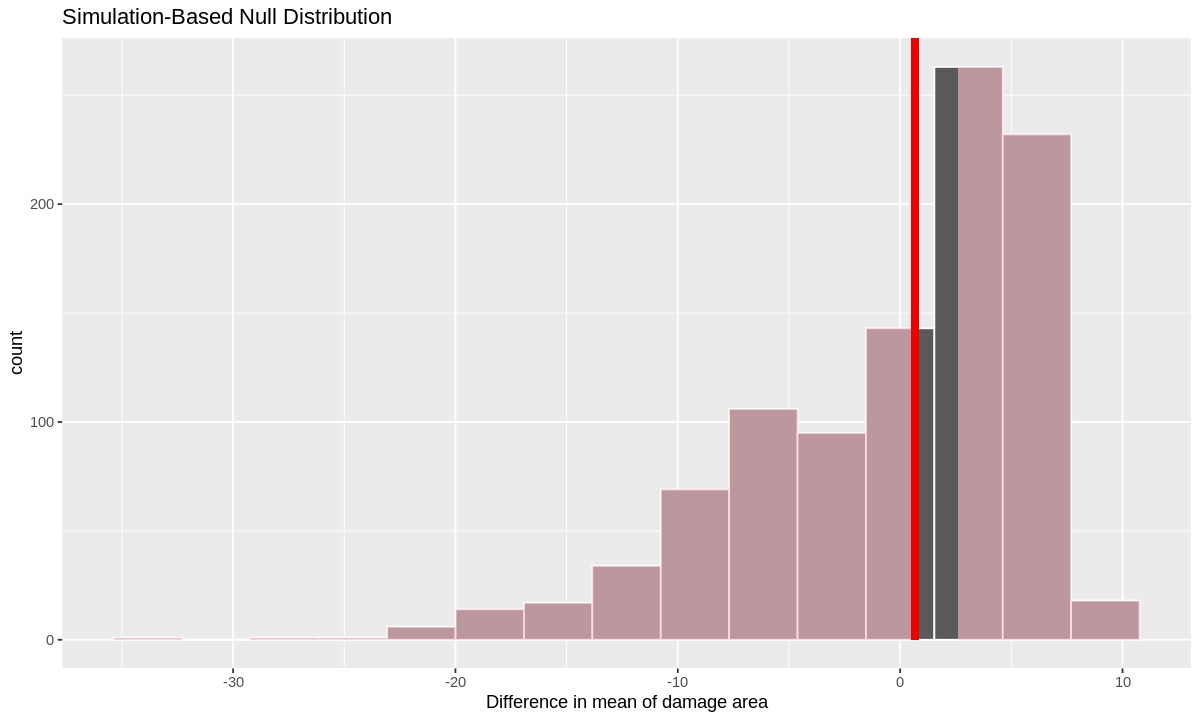

In [11]:
# Visualize the bootstrap sampling distribution of difference in means of damage area with shaded p-value.
forestfires_boostrap_plot <- null_model_forestfires %>%
                    visualize() + 
                    shade_p_value(obs_stat = test_statistic, direction = "two_sided")+
                    xlab("Difference in mean of damage area")

print('Figure 3. The bootstrap sampling distribution of difference in means')
forestfires_boostrap_plot

#### 2.2.4 Confidence interval

In [12]:
# Calculating 95% Confidence Interval using the Bootstrap infer function

bootstrap_ci <- 
    forestfires %>% 
    specify(formula = area ~ month) %>% 
    hypothesize(null = 'independence') %>%
    generate(type = "bootstrap", reps = 3000) %>% 
    calculate(stat = "diff in means", order = c("aug", "feb")) %>% 
    get_ci()


bootstrap_ci

lower_ci,upper_ci
<dbl>,<dbl>
-5.127688,8.24538


The confidence interval is -5.13 and 8.25. Our null hypothesis is that the difference of the two population means is 0. SInce our confidence interval contains 0, we would not reject our null hypothesis.

[1] "Figure 4. The bootstrap sampling distribution with the 95% Confidence Interval"


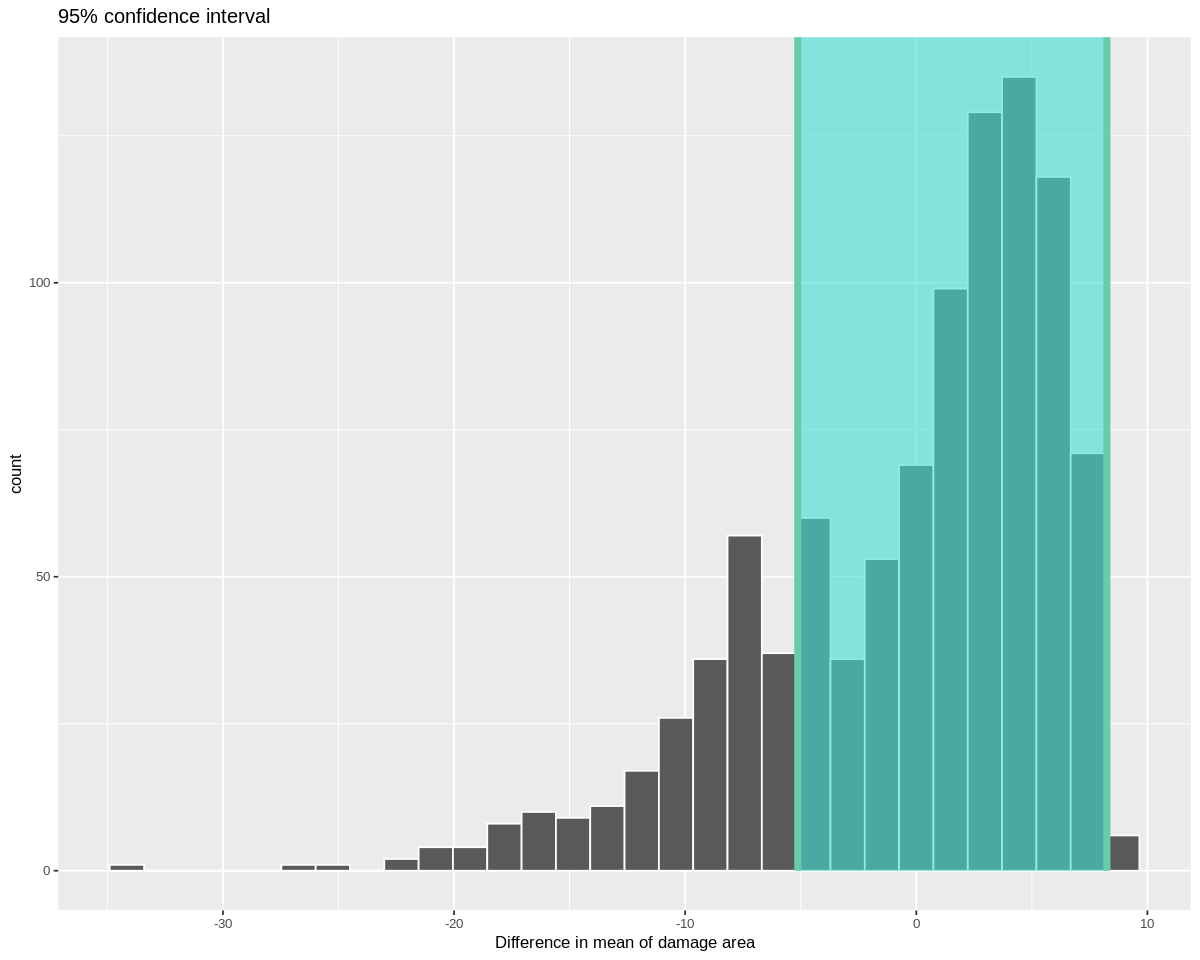

In [13]:
# Visualization of the confidence interval

options(repr.plot.width = 10, repr.plot.height = 8)

ci_damage <- null_model_forestfires %>%
                    visualize(bins = 30)+
                    shade_confidence_interval(endpoints = bootstrap_ci)+
                    theme(text = element_text(size = 10))+
                    labs(x = "Difference in mean of damage area")+
                    ggtitle("95% confidence interval")

print('Figure 4. The bootstrap sampling distribution with the 95% Confidence Interval')
ci_damage

#### 2.2.5 Summary

In [14]:
feb <- forestfires %>%
    filter(month == 'feb') %>%
    select(area)

aug <- forestfires %>%
    filter(month == 'aug') %>%
    select(area)

summary <- 
    tidy(
        t.test(x = aug ,
               y = feb,
               mu = 0,
               alternative = "two.sided"))

summary

estimate,estimate1,estimate2,statistic,p.value,parameter,conf.low,conf.high,method,alternative
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
2.20429,8.47929,6.275,0.6533453,0.517148,41.37697,-4.607455,9.016035,Welch Two Sample t-test,two.sided


Since p-value of 0.51 is greater than 0.05, we do not reject the null hypothesis at a 5% significance level. In this case, we may claim that there is not enough evidence to support that there is significant difference between the average burned areas resulting from the individual forest fire incidents that occur in February and August.

#### Evaluating Bootstrapping and Asymptotic Methods

##### Bootstrap 95% Confidence Interval

In [15]:
# Calculating 95% Confidence Interval using Bootstrap infer function
# This has been done in section 2.2.4 using the following method

# bootstrap_ci <- 
#     forestfires %>% 
#     specify(formula = area ~ month) %>% 
#     hypothesize(null = 'independence') %>%
#     generate(type = "bootstrap", reps = 3000) %>% 
#     calculate(stat = "diff in means", order = c("aug", "feb")) %>% 
#     get_ci()

bootstrap_ci

lower_ci,upper_ci
<dbl>,<dbl>
-5.127688,8.24538


##### 95% Confidence Interval of Normal Distribution

In [16]:
#Calculating 95% Confidence Interval for normal distribution using the qnorm function

damage_area_diff_means_ci <- 
    tibble(
        lower_ci = sample_mean_aug - sample_mean_feb + qnorm(0.025) * sqrt(sample_var_aug/sample_size_aug + sample_var_feb/sample_size_feb),
        upper_ci = sample_mean_aug - sample_mean_feb + qnorm(0.975) * sqrt(sample_var_aug/sample_size_aug + sample_var_feb/sample_size_feb)
    )

damage_area_diff_means_ci

lower_ci,upper_ci
<dbl>,<dbl>
-4.408336,8.816915


The the confidence interval that we obtained by using the asymptotic method is -4.41 and 8.82, and the range is approxiamtely 13.23. The 95% bootstrap confidence interval that we found in section 2.2.4 is -5.13 and 8.25, and the range is roughly 13.37301. The range of the confidence interval from the bootstrap method is only slightly larger than that from the asymptotic method, and the two methods give confidence intervals with similar boundaries. Furthermore, our null hypothesis was that the difference of the two population means is equal to 0, and the confidence intervals from both methods contain 0. Since our p-value also indicates that our null hypothesis will not be rejected, the two confidence intervals are not significant. For these reasons, we cannot conclude if one method is more appropriate than the other, and we may choose either of these methods to interpret the confidence interval.

The 95% confidence interval from the asymptotic method is -4.41 and 8.82. This indicates that we are 95% confident that the difference of our population means falls between -4.41 and 8.82. As mentioned above, having 0 for the difference of two population means was our null hypothesis, and our confidence interval further confirms that we would not reject our null hypothesis.

In [17]:
# Visualize bootstrap sampling distribution of difference of means of duration with shaded 90% confidence interval
options(repr.plot.width = 15, repr.plot.height = 8)
shade_ci_duration <- null_model_bank %>%
                    visualize(bins = 30)+
                    shade_confidence_interval(endpoints =  damage_area_diff_means_ci)+
                    labs(x = "Difference in mean of duration")
shade_ci_duration

ERROR: Error in visualize(., bins = 30): object 'null_model_bank' not found


## 3 Discussion

## 4 References

Beckwith, J., Hester, M., & Wolf, T. (2018, November). When and where are wildfires most common in the U.S.? The DataFace. Retrieved March 18, 2023, from https://thedataface.com/2018/11/public-health/wildfires-map#:~:text=June%20through%20August%20tends%20to,season%20in%20most%20years%20nationally.

Linn, R. (2019, November 1). Fluid Dynamics of wildfires. Physics Today. Retrieved March 17, 2023, from https://physicstoday.scitation.org/doi/10.1063/PT.3.4350?gclid=Cj0KCQjwn9CgBhDjARIsAD15h0A0B1JYckefhjcAkeP7sFKZJBrorMB9it32FvIJfdhSxxmx-HBuLKEaApt_EALw_wcB 
 
##### Data set:
P. Cortez and A. Morais. A Data Mining Approach to Predict Forest Fires using Meteorological Data. In J. Neves, M. F. Santos and J. Machado Eds., New Trends in Artificial Intelligence, Proceedings of the 13th EPIA 2007 - Portuguese Conference on Artificial Intelligence, December, Guimarães, Portugal, pp. 512-523, 2007. APPIA, ISBN-13 978-989-95618-0-9.